In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import seaborn as sns
# from dateutil.parser import parse as date_parser

# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.grid_search import GridSearchCV

# from sklearn.preprocessing import MinMaxScaler
# class Scaler(MinMaxScaler):
#     def transform(self,X):
#         return pd.DataFrame(super(Scaler,self).transform(X),index=X.index,columns=X.columns)

# from sklearn.externals import joblib
# scaler = joblib.load('clean/scaler.pickle')
# def scale(df):
#     df[['lat','lng']] = scaler.transform(df[['lat','lng']])
#     return df

# DETROIT_LAT = (42.252, 42.452)
# DETROIT_LNG = (-83.295, -82.895)

In [17]:
clean_permit = pd.read_pickle('clean/permit.pickle')
clean_violation = pd.read_pickle('clean/violation.pickle') 
clean_crime = pd.read_pickle('clean/crime.pickle')
clean_311 = pd.read_pickle('clean/311.pickle')

In [22]:
def cut_date(df):
    return df[df.date.map(lambda x: x.year)>=2005]

In [23]:
clean_permit, clean_violation, clean_crime, clean_311 = map(cut_date,[clean_permit, clean_violation, clean_crime, clean_311])

In [46]:
def count(df):
    return df.groupby(df.date.map(lambda x: x.date())).count().iloc[:,0].plot(figsize=(12,6))

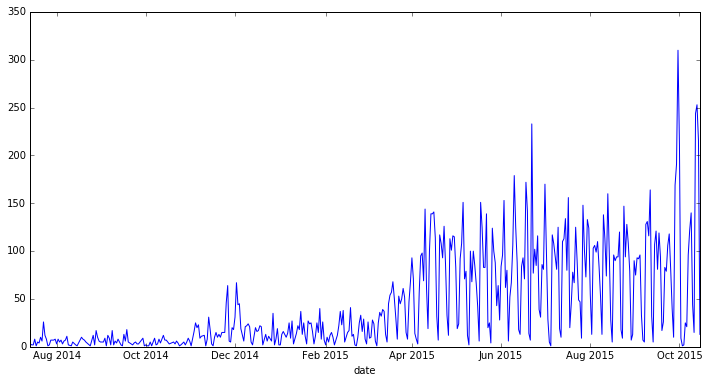

In [47]:
count(clean_311)

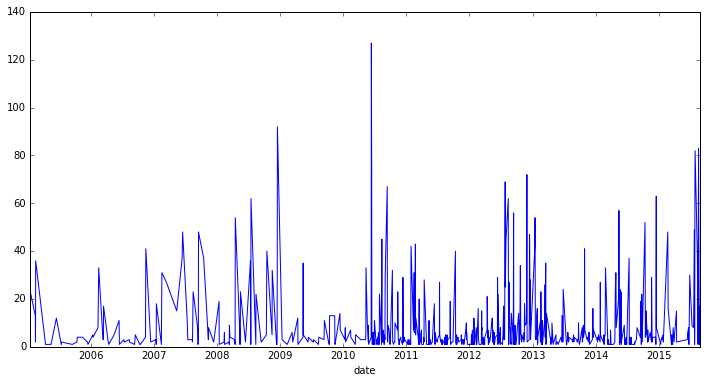

In [48]:
count(clean_permit)

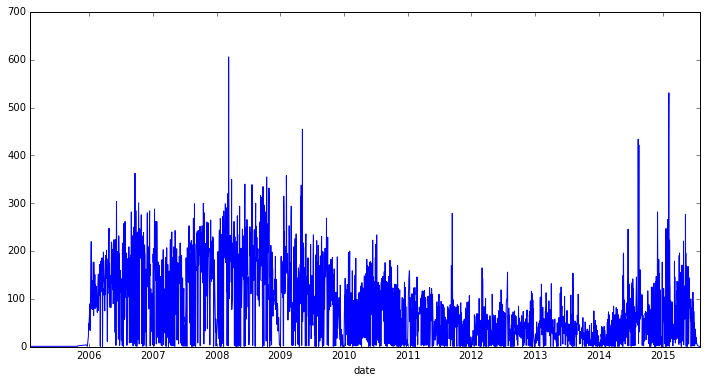

In [49]:
count(clean_violation)

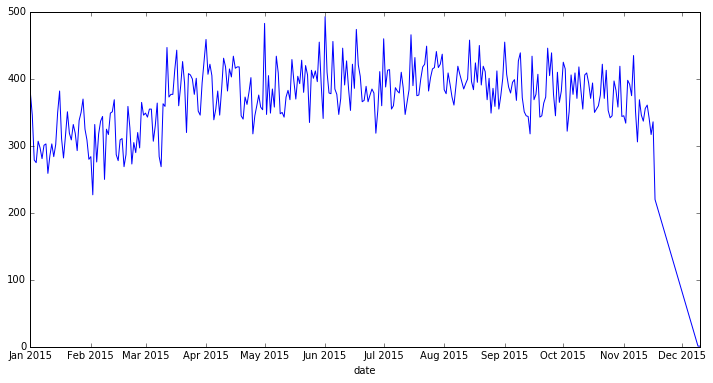

In [50]:
count(clean_crime)

In [53]:
import graphlab as gl

In [54]:
addr = gl.SFrame(clean_violation[['lat','lng']])

In [73]:
cluster = gl.kmeans.create(addr,num_clusters=20000,max_iterations=1000)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 239605    |

| 1             | 210230    |

| 2             | 31008     |

| 3             | 43779     |

| 4             | 171422    |

| 5             | 234440    |

| 10            | 30613     |

| 50            | 13188     |

| 100           | 120014    |

| 500           | 223933    |

| 1000          | 162832    |

| 1500          | 237604    |

| 2000          | 25693     |

| 2500          | 75026     |

| 3000          | 229428    |

| 3500          | 105247    |

| 4000          | 80222     |

| 4500          | 138673    |

| 5000          | 196457    |

| 5500          | 111270    |

| 6000          | 227828    |

| 6500          | 72801     |

| 7000          | 45644     |

| 7500          | 228033    |

| 8000          | 26743     |

| 8500          | 101589    |

| 9000          | 113474    |

| 9500          | 176842    |

| 10000         | 61293     |

| 10500         | 247073    |

| 11000         | 26542     |

| 11500         | 106712    |

| 12000         | 58720     |

| 12500         | 31692     |

| 13000         | 99661     |

| 13500         | 8395      |

| 14000         | 160487    |

| 14500         | 135514    |

| 15000         | 236145    |

| 15500         | 21070     |

| 16000         | 111819    |

| 16500         | 226947    |

| 17000         | 22868     |

| 17500         | 154872    |

| 18000         | 124247    |

| 18500         | 11148     |

| 19000         | 249074    |

| 19500         | 104659    |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 7017                          |

| 2         | 2307                          |

| 3         | 741                           |

| 4         | 269                           |

| 5         | 124                           |

| 6         | 55                            |

| 7         | 22                            |

| 8         | 1                             |

| 9         | 0                             |

+-----------+-------------------------------+

In [75]:
cluster.get('training_time')

412.798651

In [76]:
out = cluster.get('cluster_info').to_dataframe()
out.to_csv('cluster.csv')

In [81]:
out[out['size']<5]

,lat,lng,cluster_id,size,sum_squared_distance
7,0.663313,0.802442,7,4,1.077252e-05
33,0.942849,0.533395,33,2,2.134083e-07
35,0.787878,0.431518,35,4,2.654217e-06
75,0.911578,0.080819,75,4,2.068663e-06
88,0.920370,0.435632,88,3,2.331347e-06
90,0.425275,0.721745,90,4,0.000000e+00
108,0.561555,0.433604,108,3,4.445215e-07
111,0.581243,0.120283,111,4,0.000000e+00
115,0.550321,0.577456,115,2,0.000000e+00
134,0.981182,0.386353,134,4,0.000000e+00


In [82]:
cluster1 = gl.kmeans.create(addr,num_clusters=15000,max_iterations=20)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 197872    |

| 1             | 54435     |

| 2             | 89697     |

| 3             | 105986    |

| 4             | 26196     |

| 5             | 142094    |

| 10            | 80953     |

| 50            | 127427    |

| 100           | 142352    |

| 500           | 249967    |

| 1000          | 109893    |

| 1500          | 73701     |

| 2000          | 73040     |

| 2500          | 181974    |

| 3000          | 244471    |

| 3500          | 75051     |

| 4000          | 103835    |

| 4500          | 113003    |

| 5000          | 112312    |

| 5500          | 44628     |

| 6000          | 131545    |

| 6500          | 109914    |

| 7000          | 248339    |

| 7500          | 149504    |

| 8000          | 38533     |

| 8500          | 73524     |

| 9000          | 8315      |

| 9500          | 127610    |

| 10000         | 233012    |

| 10500         | 101037    |

| 11000         | 62745     |

| 11500         | 80955     |

| 12000         | 233613    |

| 12500         | 64258     |

| 13000         | 6179      |

| 13500         | 54454     |

| 14000         | 61607     |

| 14500         | 109087    |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 10219                         |

| 2         | 3612                          |

| 3         | 1647                          |

| 4         | 750                           |

| 5         | 347                           |

| 6         | 127                           |

| 7         | 50                            |

| 8         | 26                            |

| 9         | 10                            |

| 10        | 2                             |

| 11        | 0                             |

+-----------+-------------------------------+

In [89]:
out1 = cluster1.get('cluster_info').to_dataframe()
out1[out1['size']<2]

,lat,lng,cluster_id,size,sum_squared_distance
335,0.534715,0.635852,335,1,0.0
813,0.802525,0.701861,813,1,0.0
1010,0.378582,0.663419,1010,1,0.0
1083,0.188160,0.444554,1083,1,0.0
1484,0.613856,0.061146,1484,1,0.0
1506,0.796021,0.607604,1506,1,0.0
1721,0.419369,0.588476,1721,1,0.0
1768,0.472231,0.606686,1768,1,0.0
1882,0.783234,0.594259,1882,1,0.0
2063,0.917653,0.728785,2063,1,0.0


In [88]:
out1.sort_values(by='size')

,lat,lng,cluster_id,size,sum_squared_distance
10254,0.343982,0.586384,10254,1,0.000000
11968,0.524228,0.575230,11968,1,0.000000
11619,0.911302,0.396321,11619,1,0.000000
335,0.534715,0.635852,335,1,0.000000
14976,0.804569,0.566194,14976,1,0.000000
4640,0.650186,0.135425,4640,1,0.000000
9690,0.970248,0.782750,9690,1,0.000000
14185,0.935420,0.390653,14185,1,0.000000
9085,0.445915,0.465009,9085,1,0.000000
12217,0.499044,0.592296,12217,1,0.000000


In [90]:
cluster2 = gl.kmeans.create(addr,num_clusters=12000,max_iterations=20)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 69804     |

| 1             | 90328     |

| 2             | 68854     |

| 3             | 205694    |

| 4             | 57358     |

| 5             | 161169    |

| 10            | 210491    |

| 50            | 103815    |

| 100           | 15896     |

| 500           | 118926    |

| 1000          | 111313    |

| 1500          | 57382     |

| 2000          | 184525    |

| 2500          | 53746     |

| 3000          | 30717     |

| 3500          | 140190    |

| 4000          | 223980    |

| 4500          | 216155    |

| 5000          | 28074     |

| 5500          | 120694    |

| 6000          | 85208     |

| 6500          | 166773    |

| 7000          | 112577    |

| 7500          | 160580    |

| 8000          | 245590    |

| 8500          | 34864     |

| 9000          | 243862    |

| 9500          | 125624    |

| 10000         | 14100     |

| 10500         | 64212     |

| 11000         | 71799     |

| 11500         | 182366    |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 12459                         |

| 2         | 5108                          |

| 3         | 2274                          |

| 4         | 1206                          |

| 5         | 555                           |

| 6         | 282                           |

| 7         | 154                           |

| 8         | 100                           |

| 9         | 41                            |

| 10        | 21                            |

| 11        | 8                             |

| 12        | 7                             |

| 13        | 5                             |

| 14        | 0                             |

+-----------+-------------------------------+

In [102]:
out2 = cluster2.get('cluster_info').to_dataframe()
out2[out2['size']<5]

,lat,lng,cluster_id,size,sum_squared_distance
56,0.540788,0.403616,56,4,1.177770e-06
256,0.567629,0.726138,256,3,1.488393e-05
284,0.479688,0.494114,284,3,2.253266e-06
459,0.972213,0.809139,459,2,4.106159e-08
476,0.510590,0.694989,476,4,0.000000e+00
544,0.386236,0.667115,544,4,1.119224e-04
554,0.498857,0.675702,554,4,3.440550e-05
624,0.948213,0.292481,624,4,0.000000e+00
629,0.931183,0.802997,629,4,1.019506e-07
639,0.577239,0.697592,639,4,1.399982e-05


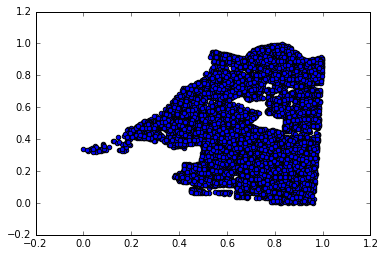

In [96]:
plt.scatter(*zip(*(out2[['lat','lng']]).values))

In [100]:
def scatter(df):
    return plt.scatter(*zip(*(df[['lat','lng']]).values))

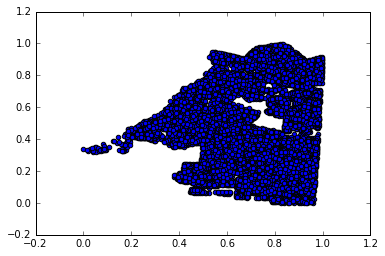

In [101]:
scatter(out1)

In [103]:
cluster3 = gl.kmeans.create(addr,num_clusters=10000,max_iterations=20)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 123124    |

| 1             | 16303     |

| 2             | 158172    |

| 3             | 163428    |

| 4             | 92190     |

| 5             | 168253    |

| 10            | 175693    |

| 50            | 153668    |

| 100           | 112094    |

| 500           | 163989    |

| 1000          | 34274     |

| 2000          | 104137    |

| 3000          | 9281      |

| 4000          | 41835     |

| 5000          | 59098     |

| 6000          | 119098    |

| 7000          | 249709    |

| 8000          | 191332    |

| 9000          | 224683    |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 14632                         |

| 2         | 6089                          |

| 3         | 2944                          |

| 4         | 1453                          |

| 5         | 849                           |

| 6         | 456                           |

| 7         | 179                           |

| 8         | 93                            |

| 9         | 49                            |

| 10        | 39                            |

| 11        | 23                            |

| 12        | 8                             |

| 13        | 6                             |

| 14        | 2                             |

| 15        | 0                             |

+-----------+-------------------------------+

In [108]:
out3 = cluster3.get('cluster_info').to_dataframe()
out3[out3['size']<2]

,lat,lng,cluster_id,size,sum_squared_distance
842,0.921874,0.454530,842,1,0.0
1185,0.901062,0.147225,1185,1,0.0
1465,0.798666,0.393476,1465,1,0.0
1954,0.458031,0.211338,1954,1,0.0
2454,0.158526,0.368369,2454,1,0.0
2601,0.722418,0.033393,2601,1,0.0
2717,0.760334,0.660969,2717,1,0.0
2720,0.232780,0.498860,2720,1,0.0
3351,0.910607,0.433974,3351,1,0.0
3494,0.690801,0.595229,3494,1,0.0


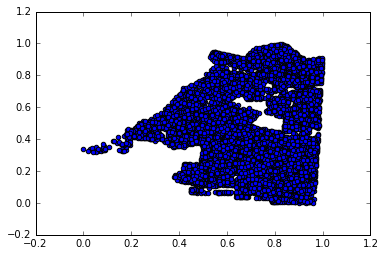

In [105]:
scatter(out3)

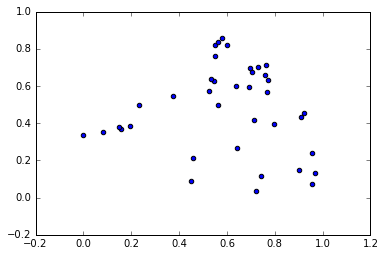

In [112]:
scatter(out3[out3['size']<2])

In [116]:
out3.to_csv('clean/cluster.csv')

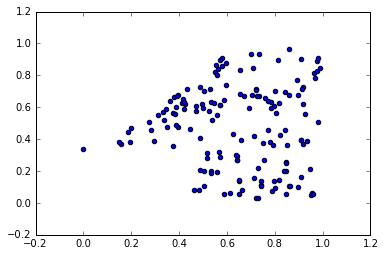

In [114]:
scatter(out1[out1['size']<2])

In [115]:
out1.to_csv('clean/cluster.csv')